In [160]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
encoder = LabelEncoder()
scaler = StandardScaler()
df = pd.read_csv(r"C:\Users\HP\Downloads\titanic-passengers.csv",sep=';')

In [161]:
print(df.head())

   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S  


In [162]:
print(df.tail())

     PassengerId Survived  Pclass  \
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex   Age  SibSp  \
886                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
887                              Sirayanian, Mr. Orsen    male  22.0      0   
888                                Cacic, Miss. Marija  female  30.0      0   
889                   Petroff, Mr. Pastcho ("Pentcho")    male   NaN      0   
890  Phillips, Miss. Kate Florence ("Mrs Kate Louis...  female  19.0      0   

     Parch  Ticket     Fare Cabin Embarked  
886      0  237736  30.0708   NaN        C  
887      0    2669   7.2292   NaN        C  
888      0  315084   8.6625   NaN        S  
889      0  349215   7.8958   NaN        S  
890      0  250655  26.0000   NaN        S  


In [163]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB
None


In [164]:
print(df.describe())
print(df.isnull().sum())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [165]:
df['Age'].fillna(df['Age'].median(), inplace = True)
print(df['Embarked'].value_counts())
df['Embarked'].fillna('S', inplace = True)
df.dropna(axis=1, how='any', thresh=600,inplace= True)
print(df.isnull().sum().sum()) #verified

S    644
C    168
Q     77
Name: Embarked, dtype: int64
0


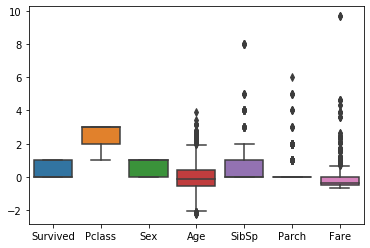

In [166]:
# all the features are important and they can affect the survival of the person( age,sex,class...).Let's start by 
#by studying the distribution of the most important feature. 
df_1 = df.drop(['PassengerId','Name','Ticket'], axis=1) #not needed
df_1['Survived'] = encoder.fit_transform(df_1['Survived'])
df_1['Sex'] = encoder.fit_transform(df_1['Sex'])

df_1['Age'] = scaler.fit_transform(df_1[['Age']].values)
df_1['Fare'] = scaler.fit_transform(df_1[['Fare']].values)
df_1
sns.boxplot(data=df_1)
#comparing the distribution.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


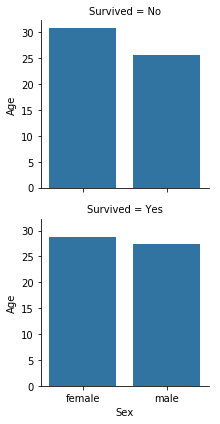

In [167]:
grid = sns.FacetGrid(df,'Survived')
grid.map(sns.barplot, 'Sex', 'Age',ci=None)
grid.add_legend()


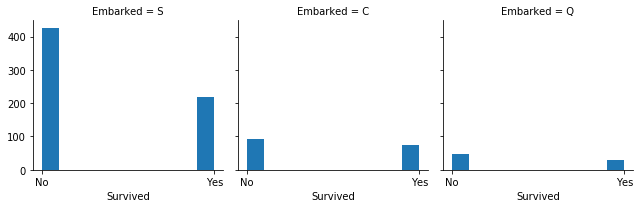

In [168]:
#choosing two features to study.
f =sns.FacetGrid(df,col='Embarked')
f.map(plt.hist,'Survived')

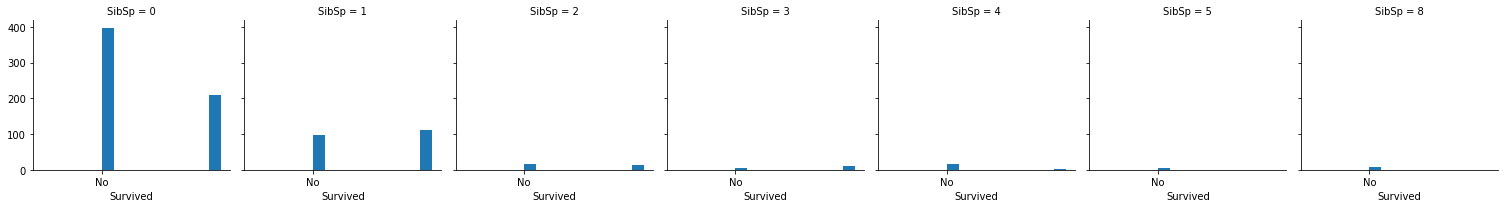

In [169]:
f =sns.FacetGrid(df,col='SibSp')
f.map(plt.hist,'Survived')

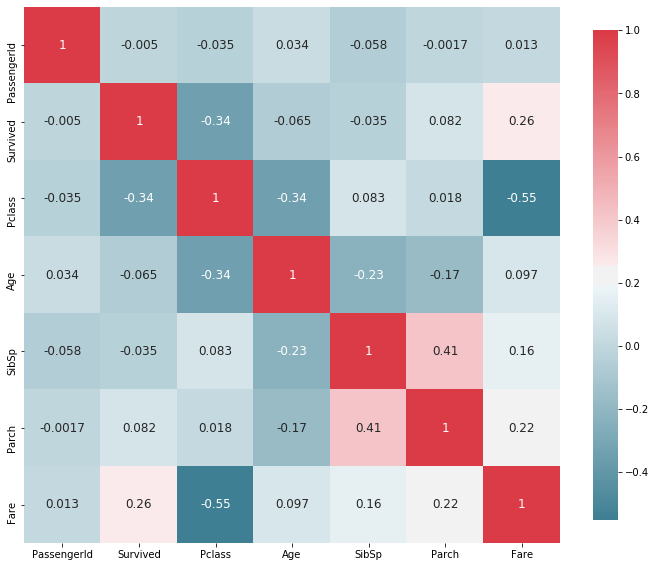

In [170]:
df['Survived'] = encoder.fit_transform(df['Survived'])

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 })
plot_correlation_map( df )
#This function provide information about the correlation degree between each two numerical values, which help us to have 
# a global view on our dataset which can help us know the correlation degree and be able to have a detailed analysis.

In [171]:
df['Survived'] = encoder.fit_transform(df['Survived'])
df[['Survived','Pclass']].groupby(['Survived'], as_index=True).mean()

,Pclass
Survived,
0,2.531876
1,1.950292


In [172]:
df['Title']= df['Name'].str.extract(pat =' ([A-Za-z]+)\.') 
del df['Name']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,male,28.0,0,0,248740,13.0000,S,Mr
1,76,0,3,male,25.0,0,0,348123,7.6500,S,Mr
2,641,0,3,male,20.0,0,0,350050,7.8542,S,Mr
3,568,0,3,female,29.0,0,4,349909,21.0750,S,Mrs
4,672,0,1,male,31.0,1,0,F.C. 12750,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.0,1,0,237736,30.0708,C,Mrs
887,61,0,3,male,22.0,0,0,2669,7.2292,C,Mr
888,535,0,3,female,30.0,0,0,315084,8.6625,S,Miss
889,102,0,3,male,28.0,0,0,349215,7.8958,S,Mr


In [173]:
df['Sex']= encoder.fit_transform(df['Sex'])
df['Survived']= encoder.fit_transform(df['Survived'])
df[['Title','Age','Fare','Sex','Parch','SibSp','Pclass','Survived']].groupby(['Title'], as_index=True).mean()

,Age,Fare,Sex,Parch,SibSp,Pclass,Survived
Title,,,,,,,
Capt,70.000000,71.000000,1.000000,1.000000,1.000000,1.000000,0.000000
Col,58.000000,31.025000,1.000000,0.000000,0.000000,1.000000,0.500000
Countess,33.000000,86.500000,0.000000,0.000000,0.000000,1.000000,1.000000
Don,40.000000,27.720800,1.000000,0.000000,0.000000,1.000000,0.000000
Dr,40.000000,49.168457,0.857143,0.000000,0.571429,1.285714,0.428571
Jonkheer,38.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
Lady,48.000000,39.600000,0.000000,0.000000,1.000000,1.000000,1.000000
Major,48.500000,28.525000,1.000000,0.000000,0.000000,1.000000,0.500000
Master,6.916750,34.703125,1.000000,1.375000,2.300000,2.625000,0.575000


In [174]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
df.replace(Title_Dictionary, inplace = True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,1,28.0,0,0,248740,13.0000,S,Mrs
1,76,0,3,1,25.0,0,0,348123,7.6500,S,Mrs
2,641,0,3,1,20.0,0,0,350050,7.8542,S,Mrs
3,568,0,3,0,29.0,0,4,349909,21.0750,S,Mrs
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.0,1,0,237736,30.0708,C,Mrs
887,61,0,3,1,22.0,0,0,2669,7.2292,C,Mrs
888,535,0,3,0,30.0,0,0,315084,8.6625,S,Miss
889,102,0,3,1,28.0,0,0,349215,7.8958,S,Mrs


In [175]:
df[['Title','Age','Fare','Sex','Parch','SibSp','Pclass','Survived']].groupby(['Title'], as_index=True).mean()

,Age,Fare,Sex,Parch,SibSp,Pclass,Survived
Title,,,,,,,
Countess,33.000000,86.500000,0.000000,0.000000,0.000000,1.000000,1.000000
Master,6.916750,34.703125,1.000000,1.375000,2.300000,2.625000,0.575000
Miss,23.021622,44.104416,0.000000,0.540541,0.702703,2.286486,0.702703
Mrs,32.030327,28.447283,0.804044,0.284603,0.367030,2.329705,0.281493
Officer,45.666667,35.786344,0.944444,0.111111,0.333333,1.444444,0.277778
Royalty,43.750000,31.062500,0.750000,0.000000,0.500000,1.000000,0.500000


In [176]:
df['FamilySize']= df["Parch"] + df["SibSp"]
del df['SibSp']
del df['Parch']

df
# this feature is useful because it gives more in depth details about the survival rate.


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize
0,343,0,2,1,28.0,248740,13.0000,S,Mrs,0
1,76,0,3,1,25.0,348123,7.6500,S,Mrs,0
2,641,0,3,1,20.0,350050,7.8542,S,Mrs,0
3,568,0,3,0,29.0,349909,21.0750,S,Mrs,4
4,672,0,1,1,31.0,F.C. 12750,52.0000,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.0,237736,30.0708,C,Mrs,1
887,61,0,3,1,22.0,2669,7.2292,C,Mrs,0
888,535,0,3,0,30.0,315084,8.6625,S,Miss,0
889,102,0,3,1,28.0,349215,7.8958,S,Mrs,0


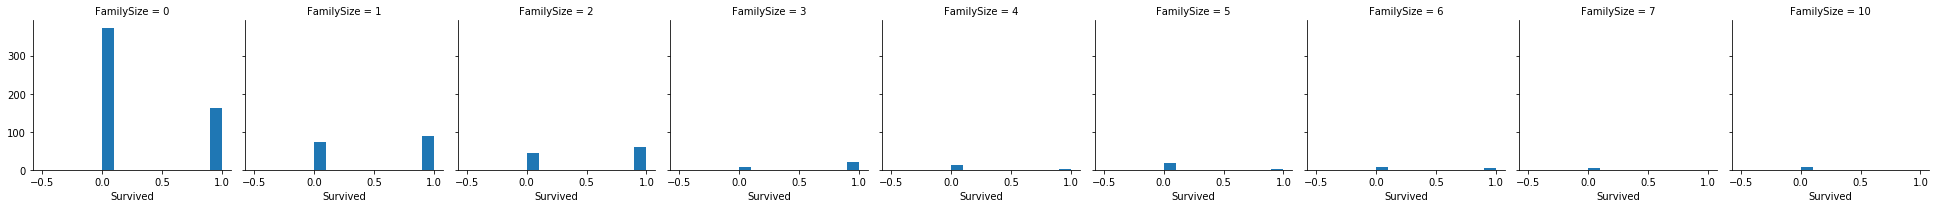

In [178]:
f =sns.FacetGrid(df,col='FamilySize')
f.map(plt.hist,'Survived')